In [1]:
def modularity(A, partition):
    def binary(edge):
        bool = edge != 0
        return int(bool)

    def delta(partition, i, j):
        return partition[i] == partition[j]

    degrees = [0] * len(A)
    m = 0
    for i in range(0, len(A)):
        for j in range(0, len(A)):
            edge = binary(A[i][j])
            degrees[i] = degrees[i] + edge
            if(j > i):
                m = m + edge

    sum = 0
    for i in range(0, len(A)):
        for j in range(0, len(A)):
            if delta(partition, i, j) and j != i:
                edge = binary(A[i][j])
                sum = sum + (edge - degrees[i]*degrees[j]/(2*m))

    return sum/(2*m)


A = [
    [0,2,22,7],
    [1,0,0,1],
    [1,0,0,1],
    [1,1,1,0]
]

partition = [0,0,1,1]
mod = modularity(A, partition)
print(mod)


0.16


In [1]:
def agglomerate(A):
    def binary(edge):
        bool = edge != 0
        return int(bool)

    degrees = [0] * len(A)
    m = 0

    for i in range(0, len(A)):
        for j in range(0, len(A)):
            edge = binary(A[i][j])
            degrees[i] = degrees[i] + edge
            if(j > i):
                m = m + edge

    """ list the length of node list """
    partition = []
    """ dictionary: partition number -> node list"""
    partitionDict = {0:[]}
    max = 0
    def getSubset(thisNode):
        nonlocal max
        maxIndex = 0
        sum = 0
        for i in range(0, len(partitionDict)):
            for node in partitionDict[i]:
                edge = binary(A[thisNode][node])
                if edge != 0:
                    sum = sum + (edge - degrees[i]*degrees[j]/(2*m))
            if sum > max:
                max = sum
                maxIndex = i
            else:
                max = 0
                maxIndex = len(partitionDict)
            sum = 0

        return maxIndex

    for node in range(0, len(A)):
        subset = getSubset(node)
        if subset >= len(partitionDict):
            partitionDict[subset] = []
        partitionDict[subset].append(node)
        partition.append(subset)

    print(partition)
    return partition


A = [
    [0,2,0,0,0],
    [1,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,1,0]
]

agglomerate(A)




0
0.75
0
0
0.75
[1, 1, 2, 3, 3]


[1, 1, 2, 3, 3]

In [27]:
print(len({1:[23,43,4], 2:[]}))

2


In [23]:
partition = agglomerate(A)
mod = modularity(A, partition)
print(mod)

[1, 1, 2, 3, 3]
0.75


In [2]:
def agglomerate(A):
    def binary(edge):
        bool = edge != 0
        return int(bool)

    degrees = [0] * len(A)
    m = 0

    for i in range(0, len(A)):
        for j in range(0, len(A)):
            edge = binary(A[i][j])
            degrees[i] = degrees[i] + edge
            if(j > i):
                m = m + edge

    for i in range(0, len(A)):
        for j in range(0, len(A)):
            edge = binary(A[i][j])
    """ list the length of node list """
    partition = []
    """ dictionary: partition number -> node list"""
    partitionDict = {0:[]}
    max = 0
    def getSubset(thisNode):
        nonlocal max
        maxIndex = 0
        sum = 0
        for i in range(0, len(partitionDict)):
            for node in partitionDict[i]:
                edge = binary(A[thisNode][node])
                if edge != 0:
                    sum = sum + (edge - degrees[i]*degrees[j]/(2*m))
            if sum > max:
                max = sum
                maxIndex = i
            else:
                max = 0
                maxIndex = len(partitionDict)
            sum = 0

        return maxIndex

    for node in range(0, len(A)):
        subset = getSubset(node)
        if subset >= len(partitionDict):
            partitionDict[subset] = []
        partitionDict[subset].append(node)
        partition.append(subset)

    print(modularity(A, partition))
    return partition


A = [
    [0,2,0,0,0],
    [1,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,1,0]
]

agglomerate(A)



NameError: name 'modularity' is not defined

In [129]:
def community(A, steps):
    partition      = [i for i in range(0, len(A))]
    pastModularity = modularity(A, partition)
    modularities = [pastModularity]
    data = {
        "partition" : partition,
        "nbPartitions" : [len(set(partition))],
        "modularities" : modularities
    }

    def mutate(A, partition):
        nonlocal pastModularity
        nonlocal data

        for i in range(0, len(A)):
            for j in range(0, len(A)):
                if partition[i] == partition[j]:
                    continue
                local = partition[i]
                partition[i] = partition[j]
                modularty = modularity(A, partition)
                if modularty > pastModularity:
                    pastModularity = modularty
                    continue
                else:
                    partition[i] = local

        data["modularities"].append(pastModularity)
        data["nbPartitions"].append(len(set(partition)))
        return partition

    modularty2 = pastModularity
    for i in range(1, steps + 1):
        partition = mutate(A, partition)
        data["partition"] = partition
        if modularty2 >= pastModularity:
            break
        modularty2 = pastModularity

    return data

/tmp/ipykernel_17401/914818505.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


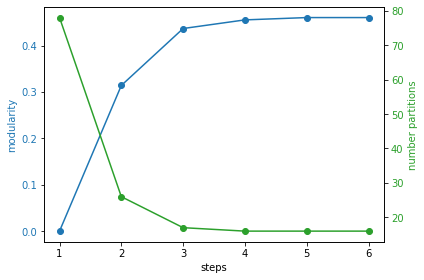

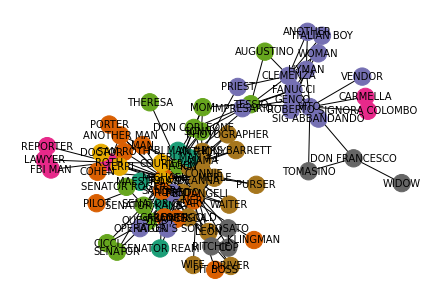

In [161]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
%matplotlib inline

G = nx.read_gml("./movies/godfather_ii.gml")

A = nx.adjacency_matrix(G)
A = A.toarray()


multidata = community(A, 7)

modularities = multidata["modularities"]
nbPartitions = multidata["nbPartitions"]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('steps')
ax1.set_ylabel('modularity', color=color)
ax1.plot(range(1, len(modularities) + 1), modularities, '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('number partitions', color=color)
ax2.plot(range(1, len(nbPartitions) + 1), nbPartitions, '-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


partition = multidata["partition"]


def drawG(G, partition):
    pos = nx.spring_layout(G, iterations=20, weight="value")
    palette = sns.color_palette("Dark2", len(set(partition)))
    colors = []
    partition_ = list(set(partition))
    for el in partition:
        colors.append(palette[partition_.index(el)])
    nx.draw(G, pos, node_color=colors, with_labels=True, font_size=10)

drawG(G, partition)

In [147]:
palette = sns.color_palette("CMRmap", len(set(partition)))



In [149]:
set(partition)


{7, 12, 15, 18, 20, 22}